## DL Assignment No. 03
3. Build the Image classification model by dividing the model into following 4 stages:

a. Loading and preprocessing the image data

b. Defining the model’s architecture

c. Training the model

d. Estimating the model’s performance

In [1]:
import numpy as np 
import pandas as pd
import keras 
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
import matplotlib.pyplot as plt

In [2]:
# a. Loading and preprocessing the image data
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Seperating the labels from the features
train_data = np.array(train_df.iloc[:, 1:])
test_data = np.array(test_df.iloc[:, 1:])

In [5]:
# Converting Numerical Label into Categorical Label
train_labels = to_categorical(train_df.iloc[:, 0])
test_labels = to_categorical(test_df.iloc[:, 0])

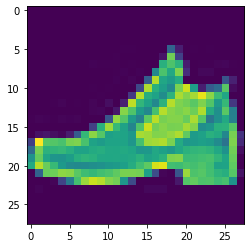

In [6]:
# Reshaping the data
train_data = train_data.reshape(60000, 28, 28, 1)
test_data = test_data.reshape(10000, 28, 28, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

plt.imshow(train_data[1])

In [7]:
# Feature Scaling
train_data /= 255
test_data /= 255

In [8]:
# Train Test Split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2)

In [9]:
# b. Defining the model’s architecture
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
# c. Training the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7902 - accuracy: 0.7450 - val_loss: 0.5860 - val_accuracy: 0.8024
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5432 - accuracy: 0.8173 - val_loss: 0.5129 - val_accuracy: 0.8230
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4942 - accuracy: 0.8297 - val_loss: 0.4847 - val_accuracy: 0.8357
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4673 - accuracy: 0.8382 - val_loss: 0.4675 - val_accuracy: 0.8383
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4500 - accuracy: 0.8435 - val_loss: 0.4461 - val_accuracy: 0.8485


In [11]:
# d. Estimating the model’s performance
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)
print("Loss =", test_loss)
print("Accuracy =", test_acc)

Loss = 0.4448453485965729
Accuracy = 0.8517000079154968
